# ANALISIS EXPLORATORIO, PLATAFORMA DE VIDEO STREAMING.  

Elaborado por: Israel Díaz - idiazg@udd.cl

Tutor: Pablo Reinoso

## INTRODUCCIÓN

La siguiente asignación esta relacionada con el trabajo final del curso Inteligencia Artificial Aplicada del Magister en Data Science. Las actividades a realzar corresponden a un analisis exploratorio de datos.

## DATOS

Los datos contienen 1 dia de interacciones entre los clientes y una plataforma de streaming.

Las variables encontradas ne el dataset son las siguientes: 

*   PAIS: corresponde al país del suscriptor.
*   ID_CLIENTE: número de identificación del cliente en la plataforma
*   TX_NOMBRE: nombre de la pelicula o serie que se ha transmitido en en la plataforma.
*   TX_ESTUDIO: estudio al cual pertenece la pelicula o serie.
*   COD_FECHA_VISUALIZACION: Fecha en el cual se ha producido la visualización
*   FECHA_PAIS: Fecha en el cual se ha producido la visualización
*   TX_DISP_CATEGORIA_ORIGINAL: Categoría del disponsitivo receptor, pej. TV, WEB, Mobile, etc.
*   TX_DISP_MODELO_ORIGINAL:  Modelo del dispositivo receptor 
*   TX_DISP_VERSION_ORIGINAL: Versión del dispositivo receptor
*   COD_PARTNER_OPERACION: Codigo del partner de operación.
*   TIPO_OPERACION: Suscripción, otro. 
*   ID_GRUPO: Identificación de grupo
*   PRECIO: Precio de la suscripción.
*   MEDIO_PAGO_NOMBRE: Medio de pago. 
*   FECHA_ULT_VIS: Fecha de última visualización
*   ULT_VIS: última visualización
*   FECHA_MAX_VIS:  Fecha de máxima visualizaciones. 
*   MAX_VIS: Máxima visualizaciones.
*   TX_DISP_FABRICANTE_ORIGINAL: Fabricante orifinal del dispositivo receptor. 





### Carga de datos desde google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/IAA/Proyecto_Final') #setea el la carpeta por defecto

### Carga de librerías 
Para realizar el análisis exploratorio de datos se cargarán las librerías mas comunes: Pandas, Numpy, Matplotlib y Seaborn. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Se carga el archivo datos_1dia.csv como un dataframe, a través del método read_csv de Pandas, los registros se encuentran separados por ;.

In [ ]:
path = 'data/datos_1dia.csv'
df = pd.read_csv(path, sep=';')

El metodo .info() se utiliza para ver información sobre el tipo de data que esta almacenada en el datagrame. 

In [ ]:
print('Filas: {} ; Columnas: {}'.format(df.shape[0], df.shape[1]))
df.info()

Filas: 20027 ; Columnas: 20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20027 entries, 0 to 20026
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   PAIS                         20027 non-null  object 
 1   ID_CLIENTE                   19641 non-null  float64
 2   TX_NOMBRE                    20027 non-null  object 
 3   TX_ESTUDIO                   20027 non-null  object 
 4   COD_FECHA_VISUALIZACION      20027 non-null  object 
 5   FECHA_PAIS                   20027 non-null  object 
 6   TX_DISP_CATEGORIA_ORIGINAL   19641 non-null  object 
 7   TX_DISP_MODELO_ORIGINAL      19641 non-null  object 
 8   TX_DISP_TIPO_ORIGINAL        19641 non-null  object 
 9   TX_DISP_VERSION_ORIGINAL     19641 non-null  object 
 10  COD_PARTNER_OPERACION        19079 non-null  float64
 11  TIPO_OPERACION               18991 non-null  object 
 12  ID_GRUPO                     20027 non-null  i

Deseo ver como se ven los datos en aras de asignar el tipo de datos de forma correcta. Registros numeros a enteros o float, segun corresponda, y asignas las categorias. 

In [ ]:
df.sample(2)

,PAIS,ID_CLIENTE,TX_NOMBRE,TX_ESTUDIO,COD_FECHA_VISUALIZACION,FECHA_PAIS,TX_DISP_CATEGORIA_ORIGINAL,TX_DISP_MODELO_ORIGINAL,TX_DISP_TIPO_ORIGINAL,TX_DISP_VERSION_ORIGINAL,COD_PARTNER_OPERACION,TIPO_OPERACION,ID_GRUPO,PRECIO,MEDIO_PAGO_NOMBRE,FECHA_ULT_VIS,ULT_VIS,FECHA_MAX_VIS,MAX_VIS,TX_DISP_FABRICANTE_ORIGINAL
15082,CHILE,198433428.0,"Darkest Minds, The",Fox,2019-01-31 17:37:11,2019-01-31 17:37:11,mobile,android,CAM-L03,Android 6.0,352428634.0,Renta,775897,0,Pincode,NaN,NaN,NaN,NaN,HUAWEI
18683,CHILE,210770562.0,American Horror Story,Fox,2019-01-31 23:11:06,2019-01-31 23:11:06,mobile,android,SM-N950F,Android 8.0.0,349447829.0,Suscripcion,597212,0,Movil,NaN,NaN,NaN,NaN,samsung


Ya identificado los datos, se procede a arreglar los datos para que formen parte de su categoria respectiva. Pero antes, debo llenar los null values o NaN, con '0' si es numero, '2019-01-01 00:00:01' si es datetime, y 'otro' si correspondera a una categoria. 

In [ ]:
integer=['ID_CLIENTE',
         'COD_PARTNER_OPERACION',
         'ID_GRUPO',
         'PRECIO',
         'ULT_VIS',
         'MAX_VIS']

datetime = ['COD_FECHA_VISUALIZACION', 
            'FECHA_PAIS',
            'FECHA_ULT_VIS',
            'FECHA_MAX_VIS']

category = ['PAIS', 'TX_NOMBRE', 'TX_ESTUDIO',
            'TX_DISP_CATEGORIA_ORIGINAL', 
            'TX_DISP_MODELO_ORIGINAL', 
            'TX_DISP_TIPO_ORIGINAL', 
            'TX_DISP_VERSION_ORIGINAL',
            'TIPO_OPERACION',
            'MEDIO_PAGO_NOMBRE',
            'TX_DISP_FABRICANTE_ORIGINAL']

In [ ]:
#llena NAs con un formato acorde al tipo de dato.
df[integer] = df[integer].fillna(0)
df[datetime] = df[datetime].fillna('2019-01-01 00:00:01')
df[category] = df[category].fillna('otro')

In [ ]:
df.sample(10)

,PAIS,ID_CLIENTE,TX_NOMBRE,TX_ESTUDIO,COD_FECHA_VISUALIZACION,FECHA_PAIS,TX_DISP_CATEGORIA_ORIGINAL,TX_DISP_MODELO_ORIGINAL,TX_DISP_TIPO_ORIGINAL,TX_DISP_VERSION_ORIGINAL,COD_PARTNER_OPERACION,TIPO_OPERACION,ID_GRUPO,PRECIO,MEDIO_PAGO_NOMBRE,FECHA_ULT_VIS,ULT_VIS,FECHA_MAX_VIS,MAX_VIS,TX_DISP_FABRICANTE_ORIGINAL
14655,CHILE,214994616.0,Malcolm in the Middle,Fox,2019-01-31 00:10:24,2019-01-31 00:10:24,mobile,android,SNE-LX3,Android 8.1.0,350193233.0,Suscripcion,613589,0,Movil,2019-01-31 00:45:16,0.0,2019-01-31 00:45:06,22.0,HUAWEI
810,CHILE,90609924.0,Seora Acero,Universal,2019-01-31 20:08:34,2019-01-31 20:08:34,mobile,aapl,iPhone,iOS 12.1.2,349366976.0,Suscripcion,778111,0,Movil,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,aapl
13737,CHILE,208799778.0,Seora Acero,Universal,2019-01-31 16:38:07,2019-01-31 16:38:07,mobile,android,SNE-LX3,Android 8.1.0,347936660.0,Suscripcion,778168,3500,Movil,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,HUAWEI
14403,CHILE,213261708.0,Mean Guns,TELEFILMS - Whiland International S.A.,2019-01-31 21:44:13,2019-01-31 21:44:13,tablet,android,SM-T560,Android 4.4.4,344153460.0,Suscripcion,615968,0,Movil,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,samsung
5611,CHILE,183727656.0,"Nanny, The",Sony,2019-01-31 09:40:57,2019-01-31 09:40:57,tv,sony,TV,2.4.2,349369794.0,Suscripcion,566780,0,Movil,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,sony
7762,CHILE,214890330.0,Malcolm in the Middle,Fox,2019-01-31 17:21:50,2019-01-31 17:21:50,tv,tizen,TV,2.4.2,349881556.0,Suscripcion,613809,0,Movil,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,samsung
19131,CHILE,210509202.0,Glee,Fox,2019-01-31 01:22:53,2019-01-31 01:22:53,tablet,aapl,iPad,iOS 9.3.5,344282863.0,Suscripcion,598907,0,Movil,2019-01-31 01:24:29,2.0,2019-01-31 01:24:29,2.0,aapl
13003,CHILE,155317956.0,Kevin Can Wait,Sony,2019-01-31 19:37:10,2019-01-31 19:37:10,tablet,aapl,iPad,iOS 9.3.5,349276239.0,Suscripcion,778386,0,Movil,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,aapl
5523,CHILE,202852998.0,Glee,Fox,2019-01-31 02:07:55,2019-01-31 02:07:55,web,html5,html5,Chrome,347382383.0,Suscripcion,599084,3500,Fija,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,windows
5129,CHILE,184928670.0,Hay alguien ah,Mediaset Espaa Comunicacin,2019-01-31 10:39:49,2019-01-31 10:39:49,tv,samsung,TV,2.4.2,348895193.0,Suscripcion,670940,3500,Fija,2019-01-01 00:00:01,0.0,2019-01-01 00:00:01,0.0,samsung


Como se ve en el resultado anterior, se han llenado los missing values con el valor deseado. 

A continuacón, deseo disminuir la cantidad de categorias en el renglón de TX_DISP_VERSION_ORIGINAL en aras de hacer un mejor analisis, y tener tantas categorias.

In [ ]:
tx_disp_ver_original = {'Chrome':'Chrome',
 'Android 8.0.0': 'Android',
 '2.4.2': 'TV',
 'Android 5.1.1': 'Android',
 'Android 9': 'Android',
 'Android 7.0': 'Android',
 'iOS 10.3.3': 'iOS',
 'Android 8.1.0': 'Android',
 'Android 6.0': 'Android',
 'iOS 12.1.2': 'iOS',
 'Android 4.4.2': 'Android',
 '10': 'Windows 10',
 'iOS 9.3.5': 'iOS',
 'Android 6.0.1': 'Android',
 'otro': 'otro',
 'iOS 12.1': 'iOS',
 'webos': 'TV',
 'tizen': 'TV',
 'Firefox': 'Firefox',
 'Android 7.1.2': 'Android',
 'iOS 11.4.1': 'iOS',
 'Android 7.1.1': 'Android',
 'Android 5.1': 'Android',
 'iOS 12.1.3': 'iOS',
 'Safari': 'Safari',
 'Edge': 'Edge',
 'Android 4.4.4': 'Android',
 'Android 5.0.2': 'Android',
 'Android 4.2.2': 'Android',
 'Android 4.1.2': 'Android',
 'iOS 12.1.1': 'iOS',
 '5S6740094401': 'generic',
 'iOS 11.2.6': 'iOS',
 'Android 5.0.1': 'Android',
 'Android+6.0': 'Android',
 '12.1.2': 'iOS',
 'hisense': 'TV',
 'orsay': 'otro',
 'iOS 11.4': 'iOS',
 'web': 'web',
 '5S673D040224': 'generic',
 'YU00V0097731': 'generic',
 'netcast': 'TV',
 'YG00AG576175': 'generic',
 '5S674V097270': 'generic',
 'freebsd': 'freebsd',
 '12.1.1': 'iOS',
 'iOS 11.3': 'iOS',
 'iOS 11.2.5': 'iOS',
 'Android 4.0.4': 'Android',
 'iOS 12.0.1': 'iOS',
 'Android+6.0.1': 'Android',
 'iOS 11.3.1': 'iOS',
 'opera': 'opera',
 'YU008V494449': 'generic',
 'YU00A6039716': 'generic',
 'iOS 11.0.3': 'iOS',
 'Android 5.0': 'Android',
 '5S6741110387': 'generic',
 'iOS 10.2.1': 'iOS',
 'iOS 11.2.1': 'iOS',
 'YU00SF044545': 'generic',
 '5S677T052901': 'generic',
 'YG004Y908861': 'generic',
 '5S677T029095': 'generic',
 'iOS 12.0': 'iOS',
 'iOS 10.0.2': 'iOS',
 'iOS 12.2': 'iOS',
 'YU002E942827': 'generic',
 'YU00SA716871': 'generic',
 'iOS 9.3.4': 'iOS',
 'YU00EV673832': 'generic',
 'Android+8.1.0': 'Android',
 '5S674U099123': 'generic',
 'YG003S892237': 'generic',
 'iOS 11.0.2': 'iOS',
 'Android+7.1.1': 'Android'}

He creado un script para asignas una nueva categoria para una ya existente. 

In [ ]:
def nuevoval(elem):
    for key in tx_disp_ver_original.keys():
      if elem != key:
        continue
      else:
        result = tx_disp_ver_original[key]
    return result

Ejecuta el script anterior en una nueva columna llamada TX_DISP_VERSION_ORIGINAL_NEW

In [ ]:
df['TX_DISP_VERSION_ORIGINAL_NEW'] = 'empty'
for i in range(len(df)):
  df['TX_DISP_VERSION_ORIGINAL_NEW'][i] = nuevoval(df['TX_DISP_VERSION_ORIGINAL'][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Como se puede ver ahora hay menos valores unicos, lo cual sera mejor a la hora de convertirlo en categorias.  

In [ ]:
df['TX_DISP_VERSION_ORIGINAL_NEW'].unique()

array(['Chrome', 'Android', 'TV', 'iOS', 'Windows 10', 'otro', 'Firefox',
       'Safari', 'Edge', 'generic', 'web', 'freebsd', 'opera'],
      dtype=object)

Eliminaré las columnas PAIS y TX_DISP_VERSION_ORIGINAL, ya que no son utilies para el analisis exploratorio. La primera debido a que todos los registros son de Chile, y la segunda porque he creado otra variable con los valores a utilizar. 

In [ ]:
columns = ['ID_CLIENTE', 'TX_NOMBRE', 'TX_ESTUDIO',
       'COD_FECHA_VISUALIZACION', 'FECHA_PAIS', 'TX_DISP_CATEGORIA_ORIGINAL', 'TX_DISP_FABRICANTE_ORIGINAL',
       'TX_DISP_MODELO_ORIGINAL', 'TX_DISP_TIPO_ORIGINAL',
       'TX_DISP_VERSION_ORIGINAL_NEW', 'COD_PARTNER_OPERACION', 'TIPO_OPERACION',
       'ID_GRUPO', 'PRECIO', 'MEDIO_PAGO_NOMBRE', 'FECHA_ULT_VIS', 'ULT_VIS',
       'FECHA_MAX_VIS', 'MAX_VIS']

In [ ]:
set(df.columns.values.tolist()) -set(columns)

{'PAIS', 'TX_DISP_VERSION_ORIGINAL'}

In [ ]:
df = df[columns]

Con la información organizada, procederé a transformar la data a las categorias finales, según lo siguiente: 

*  Si es numero, a entero o float segun corresponda. 
*  Si es fecha, a datetime
*  Si corresponde a valores repetitivos a lo largo de la variable, a una categoria. 

In [ ]:
categories = {'ID_CLIENTE': np.int64, 
           'COD_FECHA_VISUALIZACION': np.datetime64, 
           'FECHA_PAIS': np.datetime64,  
           'COD_PARTNER_OPERACION': np.int64, 
           'ID_GRUPO': np.int64, 
           'PRECIO': np.int64, 
           'FECHA_ULT_VIS': np.datetime64, 
           'ULT_VIS': np.int64, 
           'FECHA_MAX_VIS': np.datetime64, 
           'MAX_VIS': np.int64,
           'TX_DISP_CATEGORIA_ORIGINAL': 'category', 
           'TX_DISP_MODELO_ORIGINAL':'category', 
           'TX_DISP_TIPO_ORIGINAL':'category', 
           'TX_DISP_VERSION_ORIGINAL_NEW':'category',
           'TIPO_OPERACION':'category',
           'MEDIO_PAGO_NOMBRE': 'category',
           'TX_DISP_FABRICANTE_ORIGINAL': 'category'}

In [ ]:
df = df.astype(categories)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20027 entries, 0 to 20026
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID_CLIENTE                    20027 non-null  int64         
 1   TX_NOMBRE                     20027 non-null  object        
 2   TX_ESTUDIO                    20027 non-null  object        
 3   COD_FECHA_VISUALIZACION       20027 non-null  datetime64[ns]
 4   FECHA_PAIS                    20027 non-null  datetime64[ns]
 5   TX_DISP_CATEGORIA_ORIGINAL    20027 non-null  category      
 6   TX_DISP_FABRICANTE_ORIGINAL   20027 non-null  category      
 7   TX_DISP_MODELO_ORIGINAL       20027 non-null  category      
 8   TX_DISP_TIPO_ORIGINAL         20027 non-null  category      
 9   TX_DISP_VERSION_ORIGINAL_NEW  20027 non-null  category      
 10  COD_PARTNER_OPERACION         20027 non-null  int64         
 11  TIPO_OPERACION              

Como se ve en el resultado anterior, se han asignado correctamente las categorias. 

### Analisis Exploratorio

#### Deseo conocer los clientes que mas visualizaciones tuvieron durante ese mes

In [ ]:
df.ID_CLIENTE.value_counts()

0            386
135260808     77
214221486     71
210552960     63
214630986     58
            ... 
210034416      1
214496874      1
215877252      1
215903958      1
179658684      1
Name: ID_CLIENTE, Length: 4394, dtype: int64

In [ ]:
drop_indices = df[df['ID_CLIENTE'] == 0].index.tolist()

In [ ]:
df.drop(drop_indices, inplace = True)

In [ ]:
unique_clientes = pd.DataFrame(df.ID_CLIENTE.value_counts())
unique_clientes.reset_index(drop = False, inplace=True)
unique_clientes.head()

,index,ID_CLIENTE
0,135260808,77
1,214221486,71
2,210552960,63
3,214630986,58
4,212362494,57


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

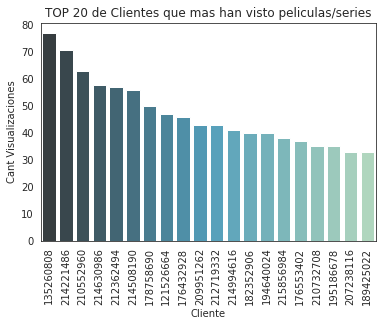

In [ ]:
#top 20 de usuarios con mas visualizaciones
sns.set_style("white")
sns.barplot(x = 'index', y='ID_CLIENTE', data=unique_clientes.head(20), 
            order=unique_clientes['index'].head(20), 
            palette='GnBu_d')
plt.xlabel('Cliente')
plt.ylabel('Cant Visualizaciones')
plt.title('TOP 20 de Clientes que mas han visto peliculas/series')
plt.xticks(rotation=90)

#### Programas (series o peliculas) mas vistos

In [ ]:
df.TX_NOMBRE.value_counts()

Malcolm in the Middle                        1887
Walking Dead, The                             690
American Horror Story                         602
Outlander                                     553
Modern Family                                 445
                                             ... 
Chicogrande                                     1
Armed Response                                  1
Twilight Zone: The Trouble with Templeton       1
Sensualidad                                     1
Show Dogs                                       1
Name: TX_NOMBRE, Length: 1475, dtype: int64

In [ ]:
unique_movies = pd.DataFrame(df.TX_NOMBRE.value_counts())
unique_movies.reset_index(drop = False, inplace=True)
unique_movies.head()

,index,TX_NOMBRE
0,Malcolm in the Middle,1887
1,"Walking Dead, The",690
2,American Horror Story,602
3,Outlander,553
4,Modern Family,445


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

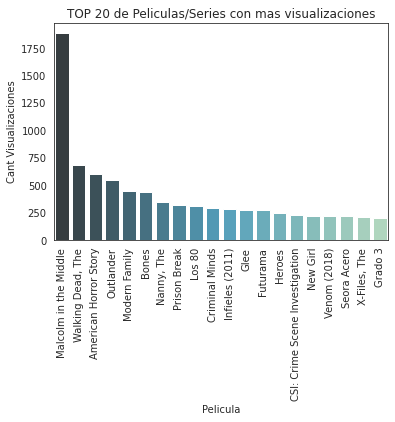

In [ ]:
#top 20 de peliculas con mas visualizaciones
sns.set_style("white")
sns.barplot(x = 'index', y='TX_NOMBRE', data=unique_movies.head(20), 
            order=unique_movies['index'].head(20), 
            palette='GnBu_d')
plt.xlabel('Pelicula')
plt.ylabel('Cant Visualizaciones')
plt.title('TOP 20 de Peliculas/Series con mas visualizaciones')
plt.xticks(rotation=90)

#### Plataformas mas utilizadas

In [ ]:
unique_equipos = pd.DataFrame(df.TX_DISP_VERSION_ORIGINAL_NEW.value_counts())
unique_equipos.reset_index(drop = False, inplace=True)
unique_equipos

,index,TX_DISP_VERSION_ORIGINAL_NEW
0,Android,8438
1,TV,6713
2,Chrome,2491
3,iOS,1286
4,Windows 10,276
5,Firefox,172
6,Safari,77
7,Edge,55
8,otro,49
9,generic,48


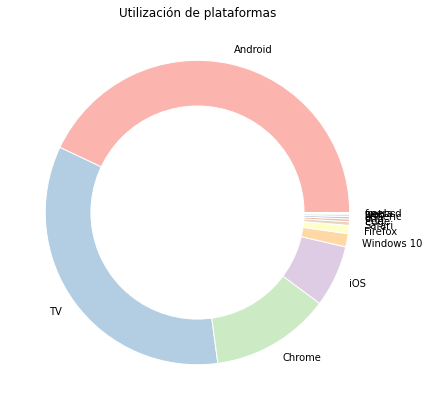

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
names=unique_equipos['index'].tolist()
size=unique_equipos['TX_DISP_VERSION_ORIGINAL_NEW'].tolist()
 
my_circle=plt.Circle((0,0), 0.7, color='white')

plt.rcParams['text.color'] = 'black'
from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Utilización de plataformas')
plt.show()

#### ¿Que ha visto el usuario mas activo durante ese mes?

In [ ]:
#Explorar al usuario mas activo. 
u_movies_c135260808 = pd.DataFrame(df[df.ID_CLIENTE == 135260808].TX_NOMBRE.value_counts())
u_movies_c135260808.reset_index(drop = False, inplace=True)
display(u_movies_c135260808.head())
u_movies_c135260808.shape


,index,TX_NOMBRE
0,Paquita la del barrio,14
1,"X-Files, The",10
2,Penguins of Madagascar,4
3,Dora the Explorer,3
4,"Walking Dead, The",3


(36, 2)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

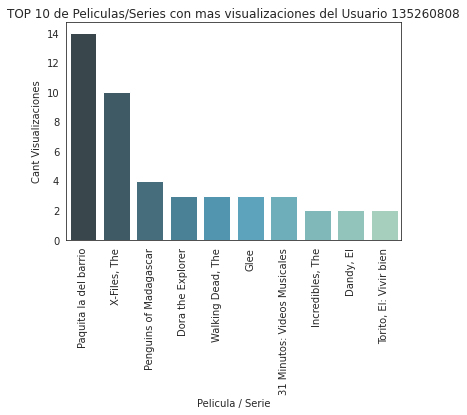

In [ ]:
sns.set_style("white")
sns.barplot(x = 'index', y='TX_NOMBRE', data=u_movies_c135260808.head(10), 
            order=u_movies_c135260808['index'].head(10), 
            palette='GnBu_d')
plt.xlabel('Pelicula / Serie')
plt.ylabel('Cant Visualizaciones')
plt.title('TOP 10 de Peliculas/Series con mas visualizaciones del Usuario 135260808')
plt.xticks(rotation=90)

##Resumen

*   El usuario que mas utilizó la plataforma de streaming durante el mes correspondiente a los datos fue usuario etiquetado con el ID 135260808 con 77 visualizaciones.

*   El programa mas visto fue `Malcolm in the middle` con 1887 visualizaciones. 

*   Los tres dispositivos de streamming mas usados son moviles con SO Android, le sigues las TV inteligentes, y por ultimo navegador web chrome.

*   Los 3 programas con mas visualizacione por el usuario 135260808, son `Paquita la del barrio`, `X-Files`, `Penguins of Madagascar`.